In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('mitbih_train.csv', header = None)
df2 = pd.read_csv('mitbih_test.csv', header = None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df1.shape

(87554, 188)

In [4]:
df2.shape

(21892, 188)

In [5]:
X = df1.iloc[:,0:187]  
y = df1.iloc[:,-1]

In [6]:
X2 = df2.iloc[:,0:187]
y2=df2.iloc[:,-1]

In [7]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.20, random_state = 42)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(256, input_dim=187, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

early_stopping = EarlyStopping(
    min_delta=0.001,
    monitor = 'val_loss',
    patience=20, 
    restore_best_weights=True,
)

In [36]:
hist = model.fit(X_train, y_train, 
                 epochs = 250, 
                 batch_size = 3500, 
                 verbose = 1, 
                 callbacks = [early_stopping], 
                 validation_data=(X_test,y_test)
) 
                
model.save('E.C.G_pred_model.h5', hist)

Epoch 1/250
21/21 [==============================] - 1s 30ms/step - loss: 0.0869 - accuracy: 0.9709 - val_loss: 0.0972 - val_accuracy: 0.9717
Epoch 2/250
21/21 [==============================] - 1s 26ms/step - loss: 0.0715 - accuracy: 0.9755 - val_loss: 0.0964 - val_accuracy: 0.9722
Epoch 3/250
21/21 [==============================] - 1s 25ms/step - loss: 0.0711 - accuracy: 0.9755 - val_loss: 0.0946 - val_accuracy: 0.9735
Epoch 4/250
21/21 [==============================] - 1s 26ms/step - loss: 0.0671 - accuracy: 0.9768 - val_loss: 0.0918 - val_accuracy: 0.9738
Epoch 5/250
21/21 [==============================] - 1s 26ms/step - loss: 0.0655 - accuracy: 0.9776 - val_loss: 0.0919 - val_accuracy: 0.9730
Epoch 6/250
21/21 [==============================] - 1s 25ms/step - loss: 0.0673 - accuracy: 0.9773 - val_loss: 0.0973 - val_accuracy: 0.9712
Epoch 7/250
21/21 [==============================] - 1s 31ms/step - loss: 0.0736 - accuracy: 0.9756 - val_loss: 0.0915 - val_accuracy: 0.9732
Epoch 

In [47]:
hist_df = pd.DataFrame(hist.history)

Best Val Loss: 0.0786
Best Val Accuracy: 0.9788


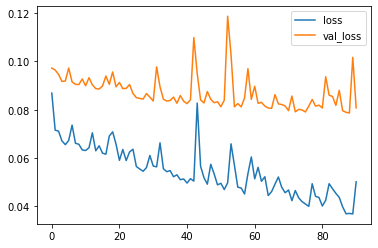

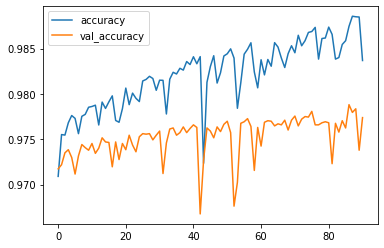

In [48]:
hist_df.loc[:, ['loss', 'val_loss']].plot()
hist_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Val Loss: {:0.4f}" +\
      "\nBest Val Accuracy: {:0.4f}")\
      .format(hist_df['val_loss'].min(), 
              hist_df['val_accuracy'].max()))

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               48128     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 115,205
Trainable params: 115,205
Non-trainable params: 0
_________________________________________________________________


In [49]:
mod_accuracy = model.evaluate(X_test, y_test, )

548/548 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9776


In [38]:
probabilities=model.predict(X_test)
print(probabilities)

[[9.8019570e-01 1.9783914e-02 1.2642639e-05 7.7988871e-06 3.0276574e-08]
 [9.9922144e-01 7.7085342e-04 1.6791997e-08 6.3925681e-06 1.3060160e-06]
 [9.9956554e-01 2.4861463e-05 1.1731299e-05 3.9757899e-04 3.1406290e-07]
 ...
 [3.8855418e-04 4.8870907e-09 9.9961144e-01 1.5872720e-09 5.7578095e-08]
 [9.9847883e-01 1.4330797e-06 1.5191125e-03 2.5137803e-10 5.4187501e-07]
 [9.9974114e-01 7.5338457e-06 2.3975130e-04 1.1484753e-05 1.4930791e-09]]


In [39]:
y_pred = np.argmax(probabilities, axis = 1)
y_pred

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [40]:
accuracy_score(y_pred, y_test)


0.9775569641939352

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     14579
         1.0       0.87      0.70      0.78       426
         2.0       0.94      0.92      0.93      1112
         3.0       0.86      0.77      0.81       145
         4.0       0.98      0.98      0.98      1249

    accuracy                           0.98     17511
   macro avg       0.93      0.87      0.90     17511
weighted avg       0.98      0.98      0.98     17511



In [51]:
mod_acc = model.evaluate(X2, y2, )

685/685 [==============================] - 1s 2ms/step - loss: 0.0942 - accuracy: 0.9764: 0s - los


In [53]:
probs=model.predict(X2)
print(probs)

[[9.9997783e-01 2.1975795e-05 8.0227530e-08 2.2408187e-08 1.7461918e-10]
 [9.3504727e-01 5.6407709e-02 6.1221565e-03 8.8450726e-04 1.5383021e-03]
 [9.8348665e-01 1.6076909e-02 4.6031830e-05 7.8693556e-05 3.1165520e-04]
 ...
 [3.6579857e-03 1.2591480e-04 2.5025148e-02 1.6463581e-04 9.7102630e-01]
 [2.0084728e-05 1.8288162e-08 4.2308720e-08 4.2388321e-10 9.9997985e-01]
 [6.4004489e-06 2.3247522e-12 2.0859101e-09 1.2452589e-13 9.9999356e-01]]


In [54]:
y2_pred = np.argmax(probs, axis = 1)
y2_pred

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [55]:
accuracy_score(y2_pred, y2)

0.9764297460259456

In [56]:
print(classification_report(y2, y2_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     18118
         1.0       0.88      0.68      0.77       556
         2.0       0.94      0.92      0.93      1448
         3.0       0.74      0.70      0.72       162
         4.0       0.98      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.91      0.85      0.88     21892
weighted avg       0.98      0.98      0.98     21892

